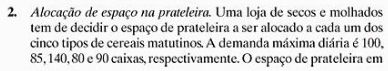
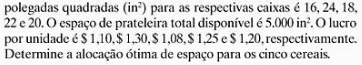

In [1]:
%pip install cplex
%pip install docplex

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Alocacao_Prateleira_Cereais')

In [3]:
# --- Parâmetros extraídos do enunciado ---

# Identificadores dos cinco tipos de cereais
cereais = [1, 2, 3, 4, 5]

# Demanda máxima diária (em caixas)
demanda_max_caixas = {1: 100, 2: 85, 3: 140, 4: 80, 5: 90}

# Espaço de prateleira necessário por caixa (em in²)
espaco_por_caixa = {1: 16, 2: 24, 3: 18, 4: 22, 5: 20}

# Lucro por unidade ($ por caixa)
lucro_por_caixa = {1: 1.10, 2: 1.30, 3: 1.08, 4: 1.25, 5: 1.20}

# Recurso total limitado
espaco_total_disponivel = 5000 # in²

In [4]:
# 1. Variáveis de Decisão
# Número de caixas de cada cereal a serem estocadas (variáveis inteiras)
num_caixas = model.integer_var_dict(cereais, name='Caixas', lb=0)


# 2. Função Objetivo
# Maximizar o lucro total
expressao_lucro = (lucro_por_caixa[c] * num_caixas[c] for c in cereais)
lucro_total = model.sum(expressao_lucro)
model.maximize(lucro_total)


# 3. Restrições

# Restrição 1: Espaço Total de Prateleira
# A soma do espaço ocupado por todas as caixas não pode exceder o total disponível.
expressao_espaco = (espaco_por_caixa[c] * num_caixas[c] for c in cereais)
soma_espaco_usado = model.sum(expressao_espaco)
restr_espaco_logica = soma_espaco_usado <= espaco_total_disponivel
model.add_constraint(restr_espaco_logica, ctname='limite_espaco_total')

# Restrição 2: Demanda Máxima
# O número de caixas de cada cereal não pode exceder sua demanda máxima.
for c in cereais:
    restr_demanda_logica = num_caixas[c] <= demanda_max_caixas[c]
    model.add_constraint(restr_demanda_logica, ctname=f'demanda_max_c{c}')

In [5]:
# Define um tempo limite para o solver (opcional)
model.parameters.timelimit = 120

# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
if solucao:
    lucro_maximo = model.objective_value
    print(f"Lucro Diário Máximo: ${lucro_maximo:,.2f}\n")

    print("--- Alocação Ótima de Produtos ---")
    espaco_total_utilizado = 0
    for c in cereais:
        caixas_val = num_caixas[c].solution_value
        espaco_utilizado = espaco_por_caixa[c] * caixas_val
        espaco_total_utilizado += espaco_utilizado
        if caixas_val > 0:
            print(f"  - Cereal {c}: {int(caixas_val)} caixas (ocupando {espaco_utilizado:,.0f} in² de espaço)")
    
    print(f"\nEspaço Total Utilizado: {espaco_total_utilizado:,.0f} de {espaco_total_disponivel} in² disponíveis.")

else:
    print("Não foi possível encontrar uma solução.")

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               120
Found incumbent of value 0.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 5 rows and 0 columns.
MIP Presolve added 1 rows and 1 columns.
MIP Presolve modified 1 coefficients.
Reduced MIP has 2 rows, 6 columns, and 9 nonzeros.
Reduced MIP has 0 binaries, 6 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
MIP Presolve added 1 rows and 1 columns.
Reduced MIP has 3 rows, 7 columns, and 12 nonzeros.
Reduced MIP has 0 binaries, 7 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes              